In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("C:\\Users\\ditib\\Downloads\\Customer_Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Change datatype of TotalCharges

In [8]:
data['TotalCharges']=data['TotalCharges'].replace(' ','0')

In [11]:
data['TotalCharges']=data['TotalCharges'].astype('float')

In [12]:
data['TotalCharges'].dtype

dtype('float64')

### Check Null values

In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Check Duplicated values

In [16]:
data.duplicated().sum()

0

In [17]:
data['customerID'].duplicated().sum()

0

### Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [19]:
def conv(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'
data['SeniorCitizen']=data['SeniorCitizen'].apply(conv)   

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data of churned customers

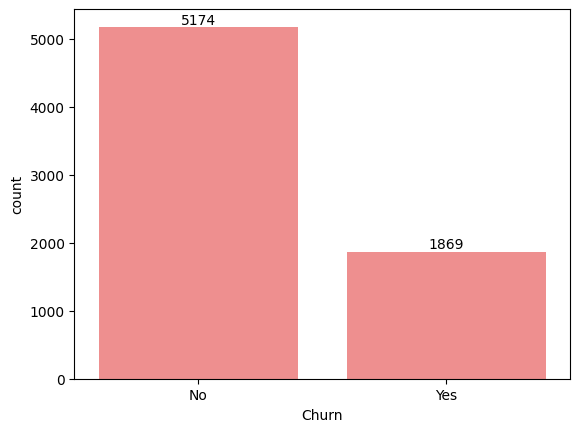

In [29]:
a= sns.countplot(x= data['Churn'],alpha=0.5,color='r')

a.bar_label(a.containers[0])

plt.show()

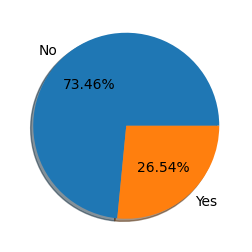

In [50]:
plt.figure(figsize=(3,4))

gb=data.groupby('Churn').agg({'Churn':'count'})

plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%",shadow=True)

plt.show()

### Churn by Gender

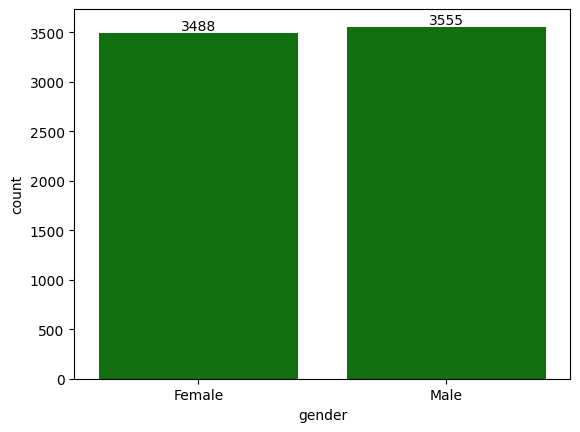

In [66]:
a= sns.countplot(x= data['gender'], color='g')

a.bar_label(a.containers[0])

plt.show()

C:\Users\ditib\AppData\Local\Temp\ipykernel_8204\1395873193.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:g'` for the same effect.

  a= sns.countplot(x= data['gender'], color='g',hue=data['Churn'])


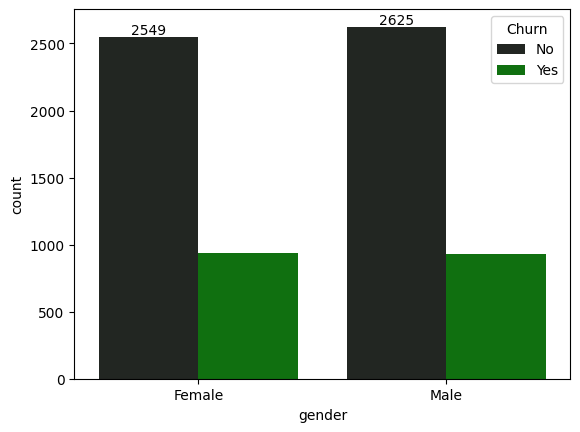

In [67]:
a= sns.countplot(x= data['gender'], color='g',hue=data['Churn'])

a.bar_label(a.containers[0])

plt.show()

### Churned by SeniorCitizen

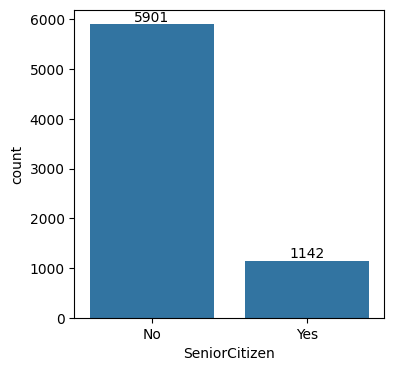

In [72]:
plt.figure(figsize=(4,4))

a=sns.countplot(x=data['SeniorCitizen'])

a.bar_label(a.containers[0])

plt.show()

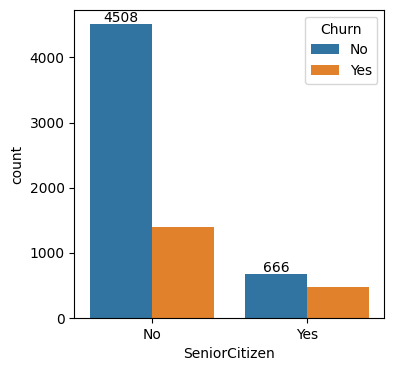

In [73]:
plt.figure(figsize=(4,4))

a=sns.countplot(x=data['SeniorCitizen'],hue=data['Churn'])

a.bar_label(a.containers[0])

plt.show()

### Data of people Churned by tenure

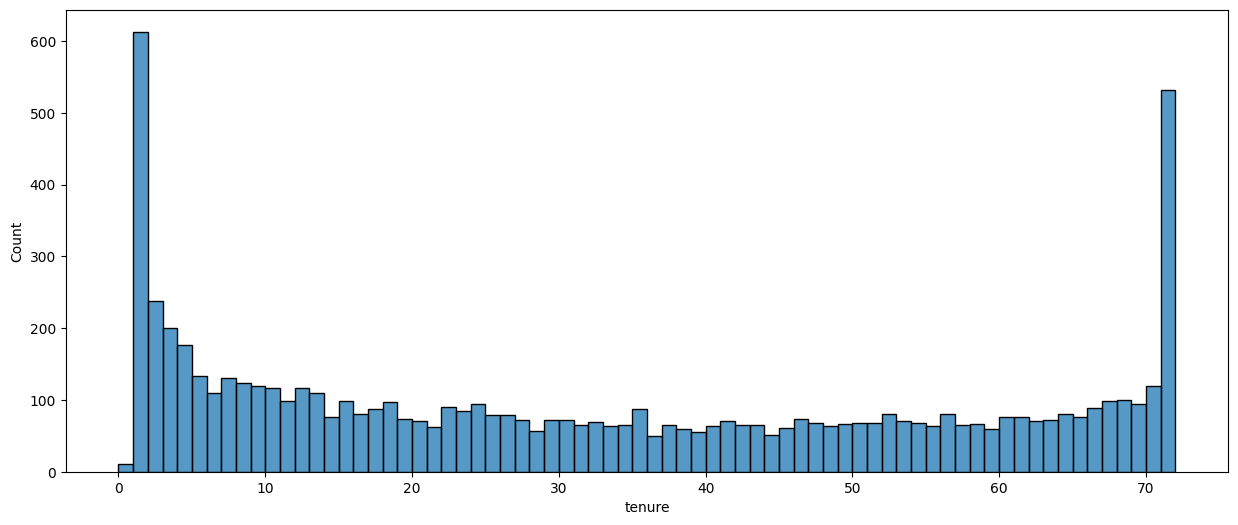

In [87]:
plt.figure(figsize=(15,6))

sns.histplot(x=data['tenure'] , bins=72)

plt.show()

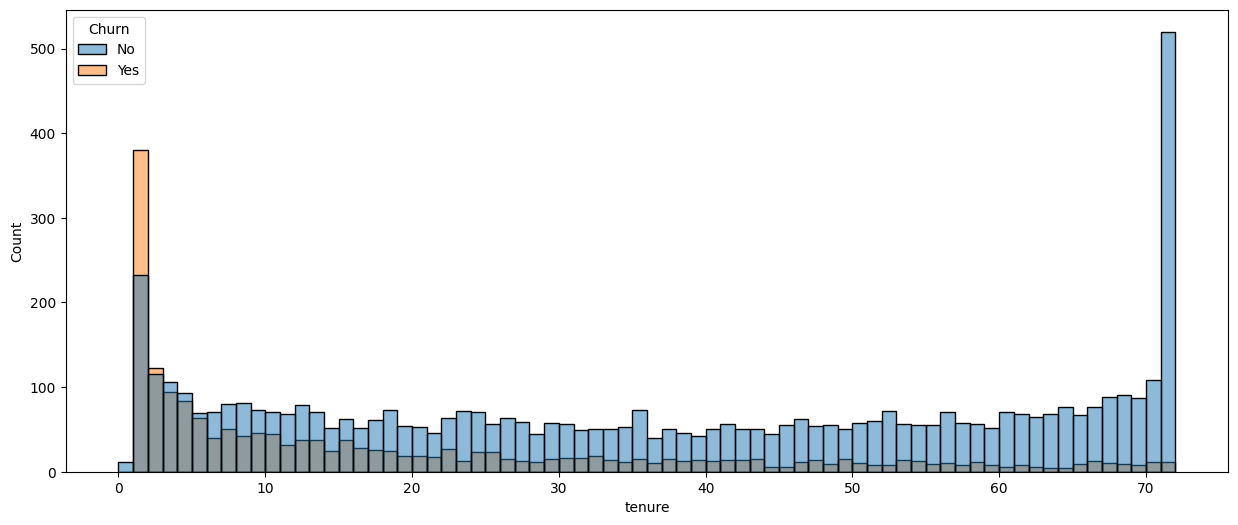

In [93]:
plt.figure(figsize=(15,6))

sns.histplot(x=data['tenure'] , bins=72, hue=data['Churn'])

plt.show()

### Contract details

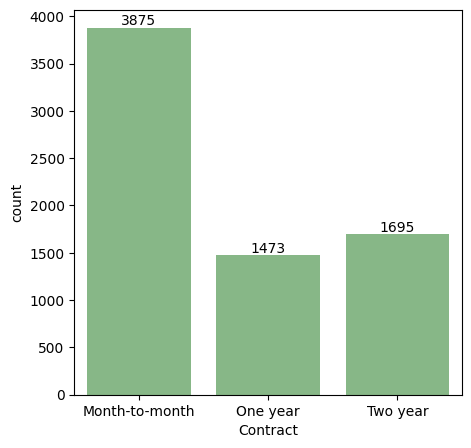

In [106]:
plt.figure(figsize=(5,5))

a= sns.countplot(x=data['Contract'],color='g',alpha=0.5)

a.bar_label(a.containers[0])

plt.show()

C:\Users\ditib\AppData\Local\Temp\ipykernel_8204\1935731966.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:g'` for the same effect.

  a= sns.countplot(x=data['Contract'],color='g',alpha=0.5,hue=data['Churn'])


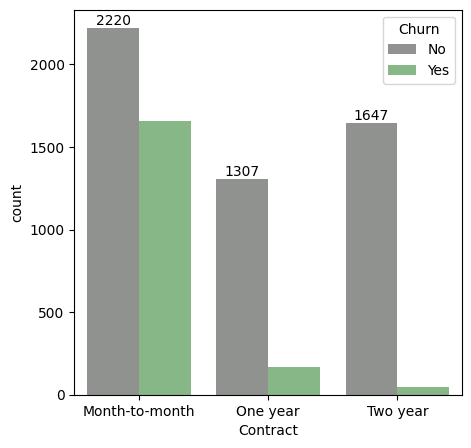

In [107]:
plt.figure(figsize=(5,5))

a= sns.countplot(x=data['Contract'],color='g',alpha=0.5,hue=data['Churn'])

a.bar_label(a.containers[0])

plt.show()

### Subplot of Services

In [12]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

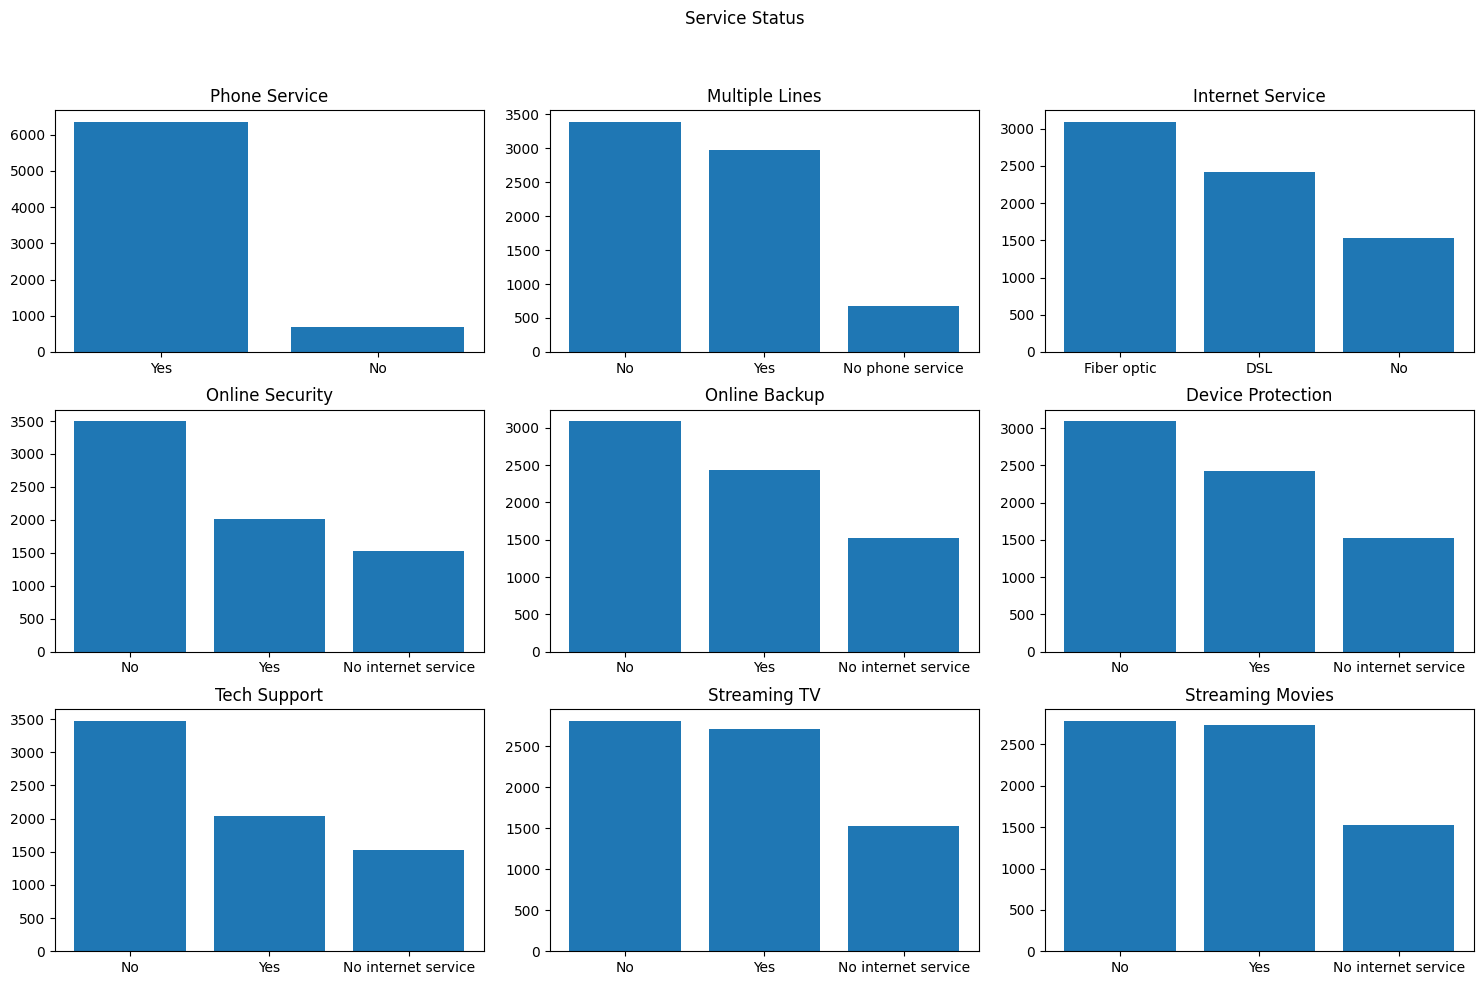

In [18]:
# Plot settings
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Service Status')

# Plot PhoneService
axs[0, 0].bar(data['PhoneService'].value_counts().index, data['PhoneService'].value_counts().values)
axs[0, 0].set_title('Phone Service')

# Plot MultipleLines
axs[0, 1].bar(data['MultipleLines'].value_counts().index, data['MultipleLines'].value_counts().values)
axs[0, 1].set_title('Multiple Lines')

# Plot InternetService
axs[0, 2].bar(data['InternetService'].value_counts().index, data['InternetService'].value_counts().values)
axs[0, 2].set_title('Internet Service')

# Plot OnlineSecurity
axs[1, 0].bar(data['OnlineSecurity'].value_counts().index, data['OnlineSecurity'].value_counts().values)
axs[1, 0].set_title('Online Security')

# Plot OnlineBackup
axs[1, 1].bar(data['OnlineBackup'].value_counts().index, data['OnlineBackup'].value_counts().values)
axs[1, 1].set_title('Online Backup')

# Plot DeviceProtection
axs[1, 2].bar(data['DeviceProtection'].value_counts().index, data['DeviceProtection'].value_counts().values)
axs[1, 2].set_title('Device Protection')

# Plot TechSupport
axs[2, 0].bar(data['TechSupport'].value_counts().index, data['TechSupport'].value_counts().values)
axs[2, 0].set_title('Tech Support')

# Plot StreamingTV
axs[2, 1].bar(data['StreamingTV'].value_counts().index, data['StreamingTV'].value_counts().values)
axs[2, 1].set_title('Streaming TV')

# Plot StreamingMovies
axs[2, 2].bar(data['StreamingMovies'].value_counts().index, data['StreamingMovies'].value_counts().values)
axs[2, 2].set_title('Streaming Movies')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


### Churned customer by peyment method

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

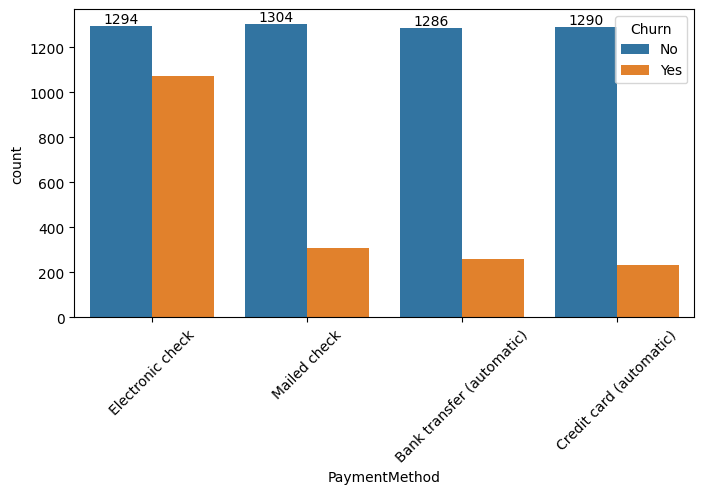

In [30]:
plt.figure(figsize=(8,4))

a= sns.countplot(x=data['PaymentMethod'],hue=data['Churn'])

a.bar_label(a.containers[0])

plt.xticks(rotation=45)